<a href="https://colab.research.google.com/github/Simeen01/Default-of-Credit-Card-Clients/blob/main/Data_Cleaning_Credit_card_client.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goal: To develop a predictive model for whether an account will default next month, given demographics and historical data.

# **Data Cleaning**

In [2]:
import pandas as pd

In [3]:
path = "https://raw.githubusercontent.com/Simeen01/Default-of-Credit-Card-Clients/main/default%20of%20credit%20card%20clients.csv"

In [38]:
df = pd.read_csv(path,skiprows=[0]) #skiprows removes the unwanted rows

In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df.shape

(30000, 25)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [8]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [9]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

Clearly, there are no null values.

In [10]:
#Since ID column seems to have unique identifiers, we can verify by counting the unique values.
df["ID"].nunique()

30000

In [11]:
df.shape

(30000, 25)

As no. of unique ID's and the no. of rows are equal, therefore the column ID is a unique identifier.

In [12]:
#list the unique IDs and how often they occur
id_counts = df['ID'].value_counts()
id_counts.head()

1        1
19997    1
20009    1
20008    1
20007    1
Name: ID, dtype: int64

In [13]:
#number of grouped duplicated entries
id_counts.value_counts()

1    30000
Name: ID, dtype: int64

In [14]:
df["PAY_0"].head(5)

0    2
1   -1
2    0
3    0
4   -1
Name: PAY_0, dtype: int64

As per data dictionary, the value 0 is not present.

[The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.]

In [15]:
df['PAY_0'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

Output reveals two undocumented values : 0 and -2.


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl #additional plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high resolution figures

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2bfb3f8450>,
      dtype=object)

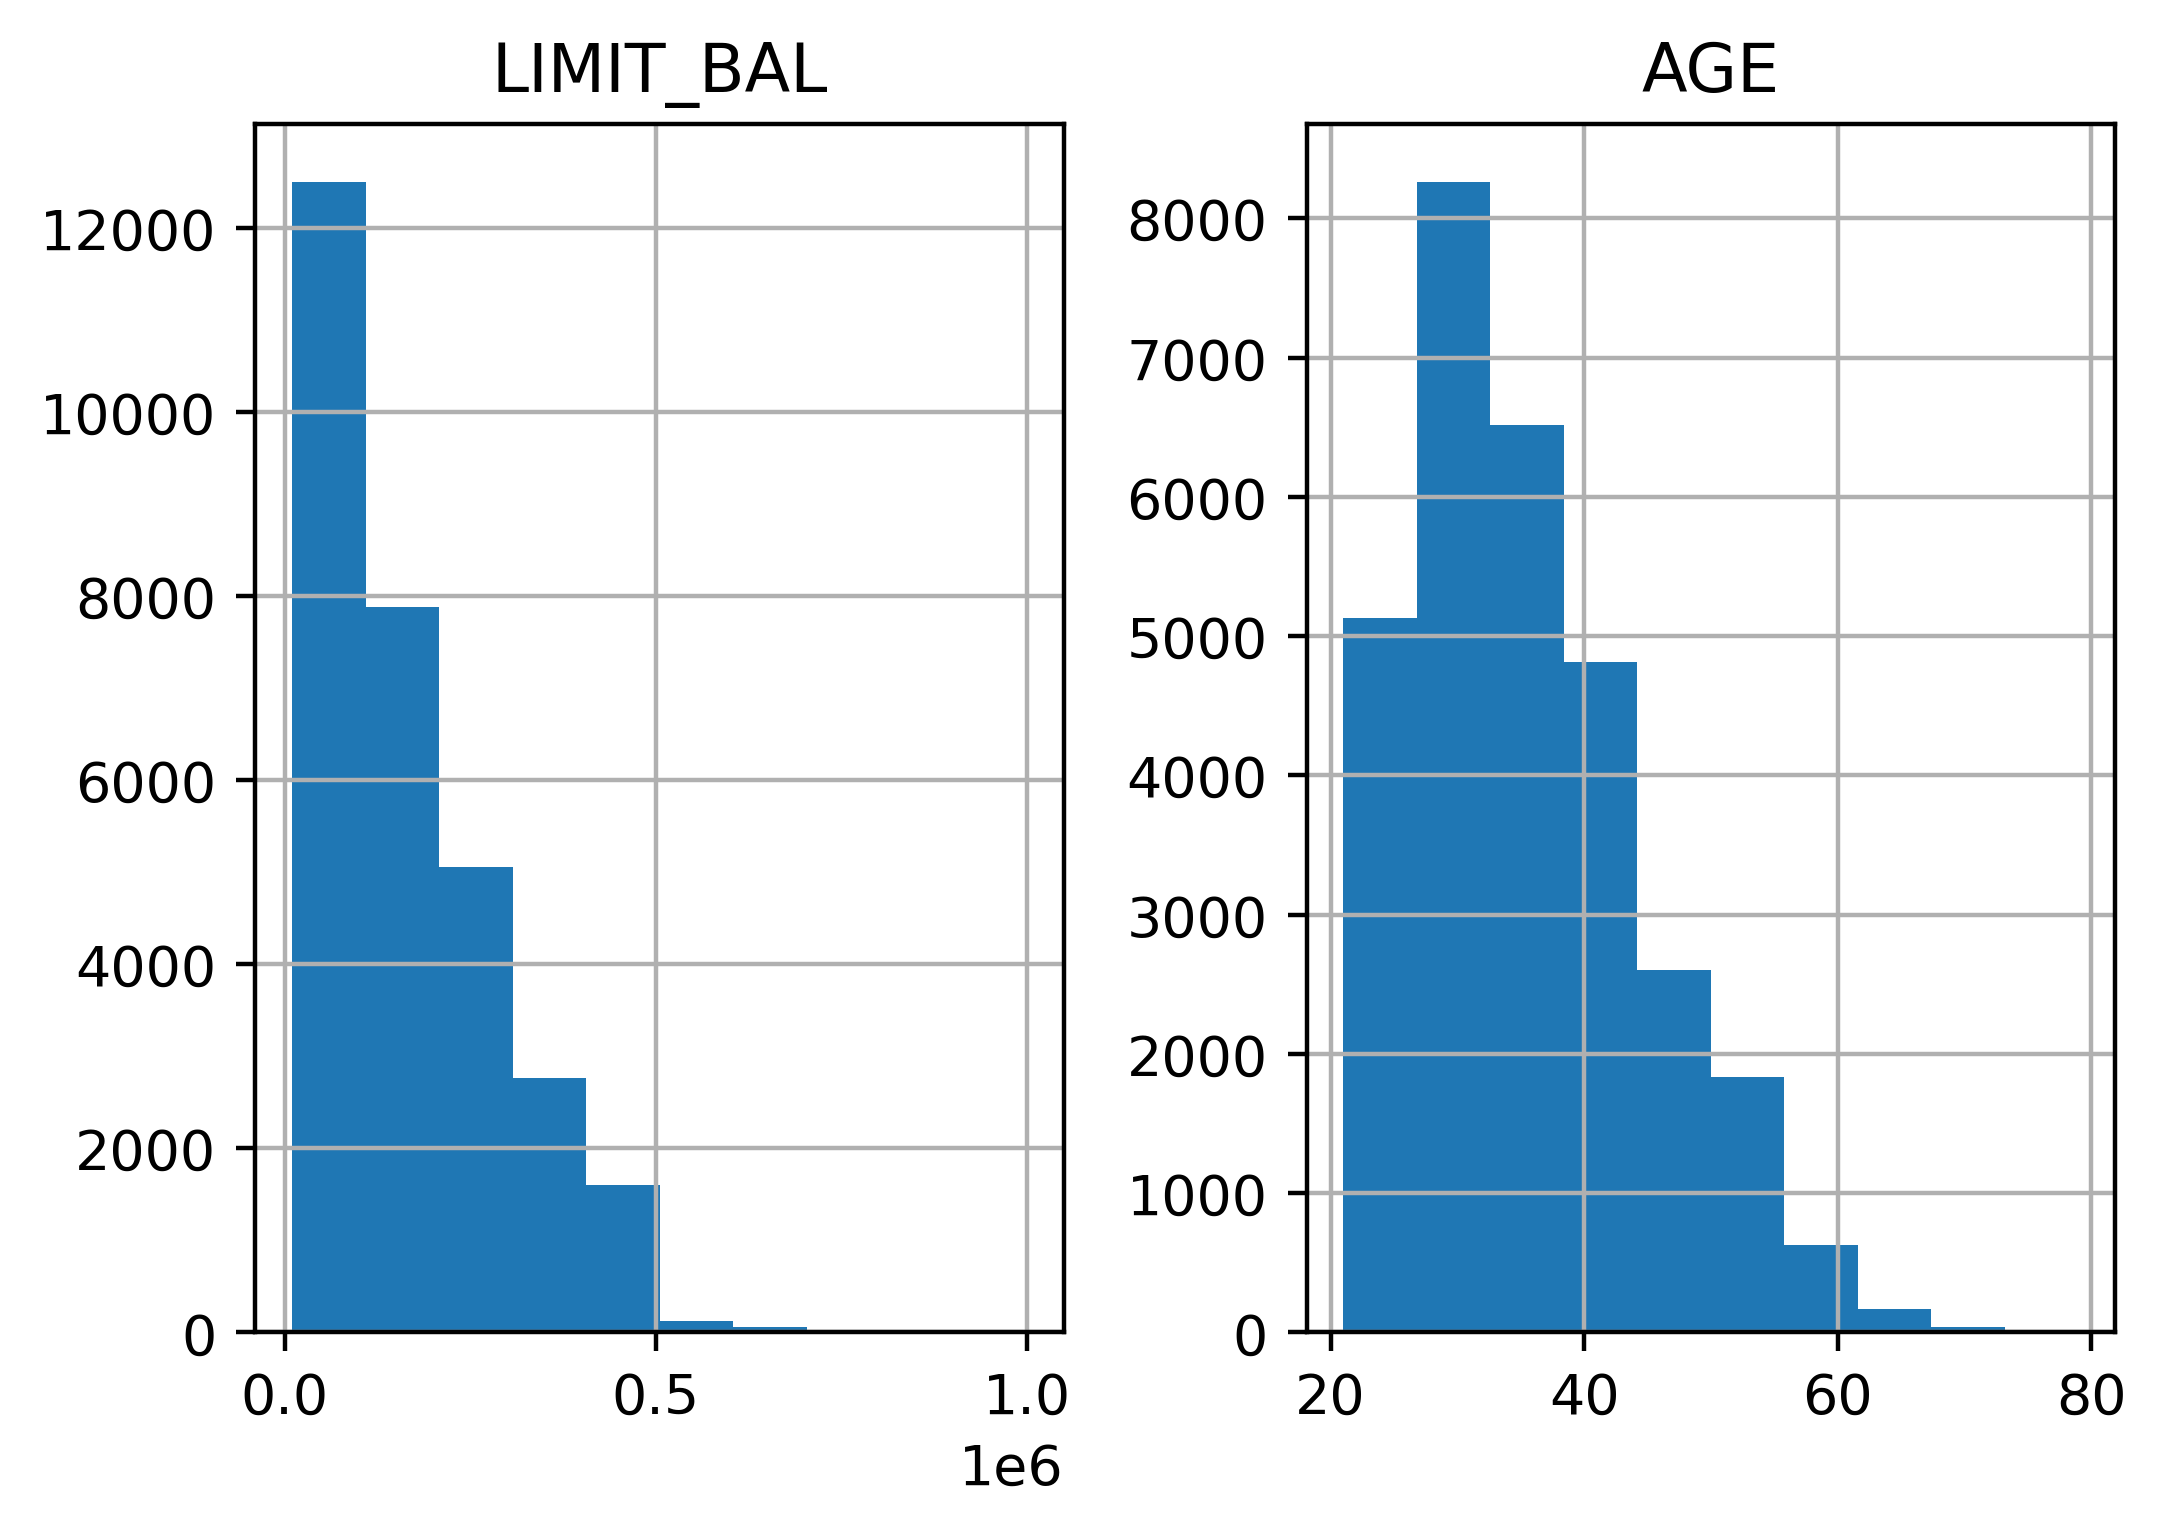

In [20]:
df[['LIMIT_BAL',"AGE"]].hist()

In [21]:
df[['LIMIT_BAL',"AGE"]].describe()

,LIMIT_BAL,AGE
count,30000.000000,30000.000000
mean,167484.322667,35.485500
std,129747.661567,9.217904
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,1000000.000000,79.000000


From above we can observe:
- Credit limit ⤵
    
1. min - 10000

- Age ⤵

1.   min age - 21








In [39]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

Undocumented values - 0,5,6

[Education (1 = graduate school; 2 = university; 3 = high school; 4
= others)]

Since 4=others, we can replace the undocumented values under this value.

In [40]:
df_clean = df.copy()

In [42]:
df_clean.shape

(30000, 25)

In [44]:
df_clean['EDUCATION'].replace(to_replace=[0,5,6],value=4,inplace=True)

In [45]:
df_clean['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

We have replaced the values 0,5,6 with 4, which denotes others.

In [46]:
df_clean['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

Undocumented value - 0

["1 = married; 2 = single; 3 = others"]

In [47]:
#replacing 0 with 3(others)
df_clean['MARRIAGE'].replace(to_replace=[0],value=3,inplace=True)

In [48]:
df_clean['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [49]:
df_clean.groupby('EDUCATION').agg({'default payment next month':'mean'})

,default payment next month
EDUCATION,
1,0.192348
2,0.237349
3,0.251576
4,0.070513


Checking whether an ordinal encoding will work well with a linear model

Text(0, 0.5, 'Default Rate')

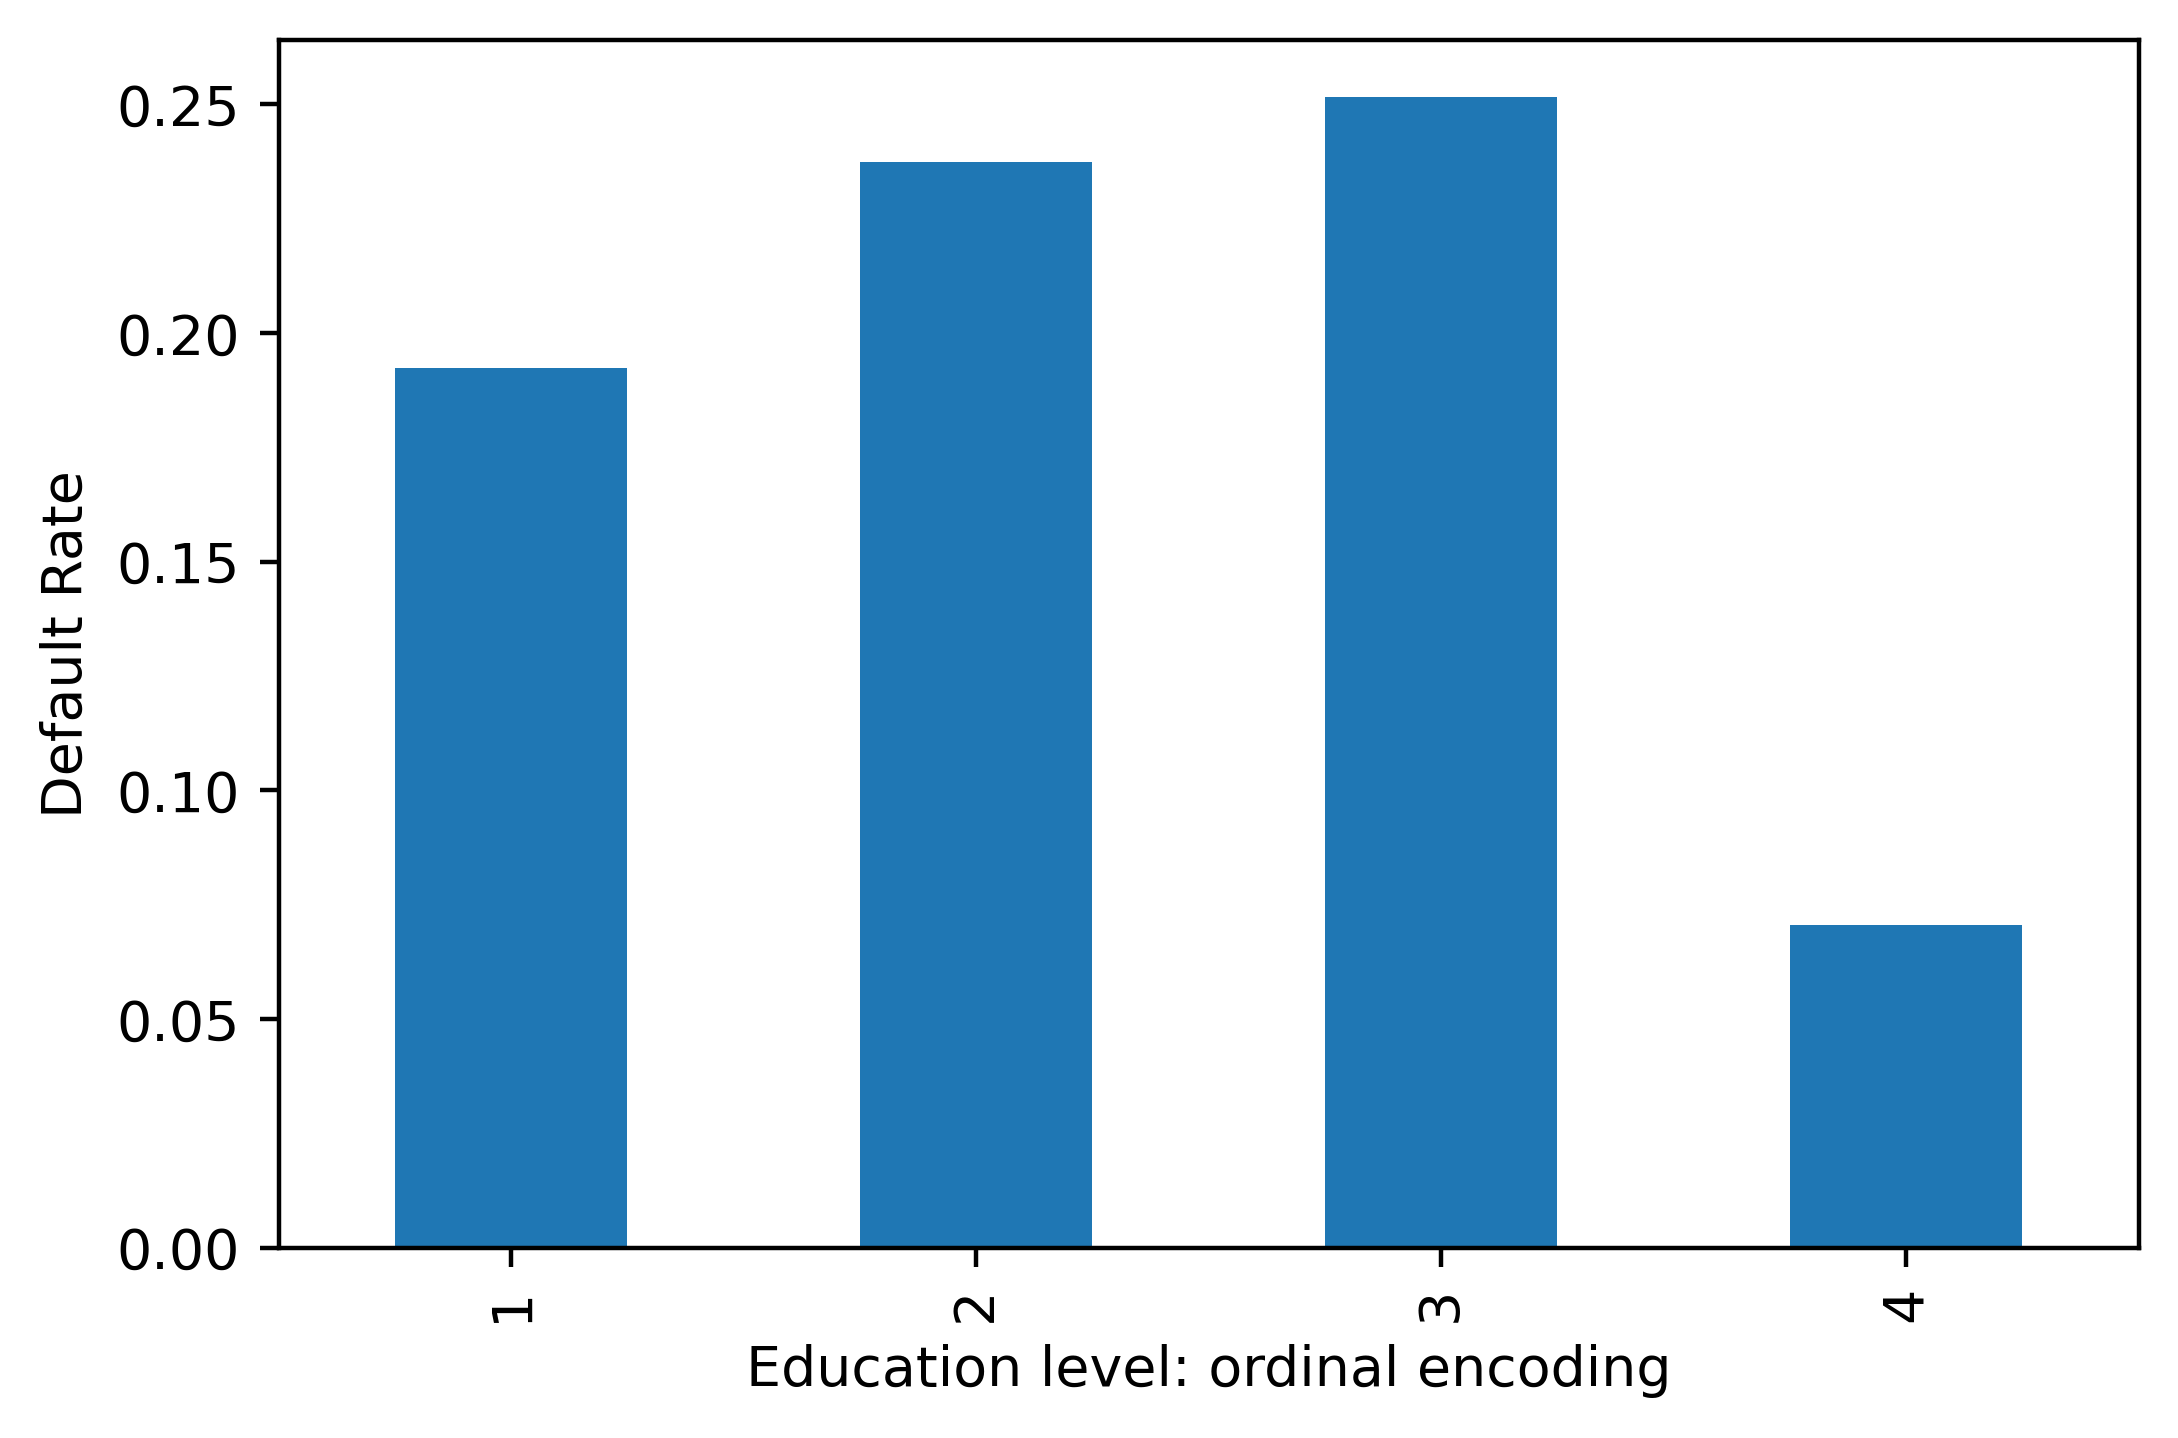

In [51]:
df_clean.groupby('EDUCATION').agg({'default payment next month':'mean'}).plot.bar(legend=False)
plt.xlabel("Education level: ordinal encoding")
plt.ylabel("Default Rate")

Since a straight line relationship cannot be formed, going for decision tree or random forest will be better or a more linear interpretable model such as logistic regression is desired.

## ***one-hot encoding (OHE)***
OHE is a way to transform a categorical feature, which may consist of text labels in the raw data, into a numerical feature that can be used in mathematical models.

In [52]:
#reverse engineer
#Change Education values from numerical labels back to categorical values.



> Education (1 = graduate school; 2 = university; 3 = high school; 4
= others)



In [53]:
#creating empty column
df_clean['Education_CAT'] = 'none'

In [56]:
df_clean[['EDUCATION','Education_CAT']].head(10)

,EDUCATION,Education_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [57]:
#dictionary of education labels
edu_mapping = {
    1:"graduate school",
    2:"university",
    3:"high school",
    4:"others"
}

In [58]:
df_clean['Education_CAT'] = df_clean["EDUCATION"].map(edu_mapping)

In [59]:
df_clean[['EDUCATION',"Education_CAT"]].head(10)

,EDUCATION,Education_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [60]:
#new dataframe with the values of 'Education_CAT' as columns
edu_ohe = pd.get_dummies(df_clean["Education_CAT"])
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [62]:
#to view clear picture of a comparison between categorical and numerical corresponding values
df_with_ohe = pd.concat([df_clean, edu_ohe], axis=1)
df_with_ohe[['Education_CAT', 'graduate school','high school', 'university', 'others']].head(10)

,Education_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0
